<a href="https://colab.research.google.com/github/Kashvi1666/ai-stellar-metallicity/blob/master/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import astropy
from astropy import constants as const
from astropy import units as u
from astropy.io import fits
from astropy.table import Table

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

# set path to folder
folder_path = '/content/drive/MyDrive/AI_Fellowship_Kashvi/Datasets'

# change current working directory to specified folder path
os.chdir(folder_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# open file
with fits.open('allStarLite-dr17-synspec_rev1.fits') as hdul:

    # select index 1 of our raw dataset
    data = hdul[1].data
    # convert to table
    table = Table(data)

    # print table column names
    print(table.colnames)


['APOGEE_ID', 'TELESCOPE', 'FIELD', 'ALT_ID', 'RA', 'DEC', 'GLON', 'GLAT', 'J', 'J_ERR', 'H', 'H_ERR', 'K', 'K_ERR', 'AK_TARG', 'AK_TARG_METHOD', 'AK_WISE', 'SFD_EBV', 'APOGEE_TARGET1', 'APOGEE_TARGET2', 'APOGEE2_TARGET1', 'APOGEE2_TARGET2', 'APOGEE2_TARGET3', 'APOGEE2_TARGET4', 'TARGFLAGS', 'SURVEY', 'PROGRAMNAME', 'NVISITS', 'SNR', 'SNREV', 'STARFLAG', 'STARFLAGS', 'ANDFLAG', 'ANDFLAGS', 'VHELIO_AVG', 'VSCATTER', 'VERR', 'RV_TEFF', 'RV_LOGG', 'RV_FEH', 'RV_ALPHA', 'RV_CARB', 'RV_CHI2', 'RV_CCFWHM', 'RV_AUTOFWHM', 'RV_FLAG', 'N_COMPONENTS', 'MEANFIB', 'SIGFIB', 'MIN_H', 'MAX_H', 'MIN_JK', 'MAX_JK', 'GAIAEDR3_SOURCE_ID', 'GAIAEDR3_PARALLAX', 'GAIAEDR3_PARALLAX_ERROR', 'GAIAEDR3_PMRA', 'GAIAEDR3_PMRA_ERROR', 'GAIAEDR3_PMDEC', 'GAIAEDR3_PMDEC_ERROR', 'GAIAEDR3_PHOT_G_MEAN_MAG', 'GAIAEDR3_PHOT_BP_MEAN_MAG', 'GAIAEDR3_PHOT_RP_MEAN_MAG', 'GAIAEDR3_DR2_RADIAL_VELOCITY', 'GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR', 'GAIAEDR3_R_MED_GEO', 'GAIAEDR3_R_LO_GEO', 'GAIAEDR3_R_HI_GEO', 'GAIAEDR3_R_MED_PHOTO

In [ ]:
# parameter selections
column_names = ['LOGG', 'TEFF', 'SNR', 'M_H', 'ALPHA_M', 'VSINI', 'RV_FEH', 'FE_H', 'O_FE', 'C_FE', 'MG_FE']
selected_columns = {name: table[name] for name in column_names}

# converting selected columns to a single dataframe
df = pd.DataFrame(selected_columns)

# convert all big-endian columns to little-endian
for col, dtype in df.dtypes.items():
    if dtype.byteorder == '>':
        df[col] = df[col].values.byteswap().newbyteorder()

In [ ]:
df

LOGG         TEFF         SNR       M_H   ALPHA_M      VSINI  \
0       4.428520  5694.898438  418.927612  0.005657  0.006679   4.778923   
1       0.904598  3723.911133  827.156494 -0.147680  0.036922        NaN   
2       4.304115  5501.772949  229.875061 -0.268750  0.090978   6.273645   
3       3.673970  6099.780762  121.325897 -0.245100  0.029159  14.965801   
4       3.715561  6162.030273  221.824417 -0.221510  0.048066  14.993395   
...          ...          ...         ...       ...       ...        ...   
733896       NaN          NaN  137.181641       NaN       NaN        NaN   
733897  2.480687  4859.908691  203.667267 -0.229250  0.065434        NaN   
733898  2.571437  4585.409668  130.770752  0.119920  0.037709        NaN   
733899  1.334888  4509.591309   33.586742 -1.041800 -0.019310        NaN   
733900  3.972290  6281.626953  209.745667 -0.672220  0.238005  11.603794   

          RV_FEH      FE_H      O_FE      C_FE     MG_FE  
0      -0.203651  0.003463  0.114938  0.004847  0.035147  
1      -0.401404 -0.160680  0.083402  0.009295  0.030429  
2      -0.436139 -0.275530  0.235343  0.061738  0.165238  
3      -0.702422 -0.252970  0.045069  0.112730  0.038494  
4      -0.724421 -0.214170  0.140573  0.032651 -0.001095  
...          ...       ...       ...       ...       ...  
733896 -0.135259       NaN       NaN       NaN       NaN  
733897 -0.365796 -0.236560  0.088913 -0.060314  0.083532  
733898  0.001282  0.114820  0.050574 -0.011308  0.064306  
733899 -1.147642 -1.050500 -0.064257 -0.616490 -0.211707  
733900 -1.079865 -0.649270  0.284273  0.210440  0.293968  

[733901 rows x 11 columns]

## Missing values

In [ ]:
# removing missing values rows
filtered_df = df.dropna()

# keeping the first 60000 rows
final_df = filtered_df.head(60000)

In [ ]:
len(final_df)

60000

In [ ]:
final_df

LOGG         TEFF         SNR       M_H   ALPHA_M      VSINI  \
0       4.428520  5694.898438  418.927612  0.005657  0.006679   4.778923   
2       4.304115  5501.772949  229.875061 -0.268750  0.090978   6.273645   
3       3.673970  6099.780762  121.325897 -0.245100  0.029159  14.965801   
4       3.715561  6162.030273  221.824417 -0.221510  0.048066  14.993395   
7       4.123192  5945.750977  126.087601 -0.267040  0.012409   6.752274   
...          ...          ...         ...       ...       ...        ...   
167839  3.145732  4835.700684  192.897934 -0.382650  0.213795   1.506850   
167841  4.559365  4707.893555   80.141541  0.214300 -0.000732   2.982085   
167845  4.571105  4819.504883  218.505753  0.020112  0.126085   1.531087   
167850  4.407156  5511.842285  396.759094  0.122620  0.005018   1.500410   
167851  4.260726  5692.116211  126.404129 -0.010105 -0.002214   1.626410   

          RV_FEH      FE_H      O_FE      C_FE     MG_FE  
0      -0.203651  0.003463  0.114938  0.004847  0.035147  
2      -0.436139 -0.275530  0.235343  0.061738  0.165238  
3      -0.702422 -0.252970  0.045069  0.112730  0.038494  
4      -0.724421 -0.214170  0.140573  0.032651 -0.001095  
7      -0.629639 -0.261890  0.016418  0.049917  0.046251  
...          ...       ...       ...       ...       ...  
167839 -0.502395 -0.383300  0.289343  0.081965  0.276843  
167841  0.328633  0.210700 -0.021148  0.049369  0.021240  
167845  0.141916  0.015282  0.088623  0.013591  0.254909  
167850  0.010991  0.124900  0.067377  0.032305  0.044800  
167851 -0.229170 -0.003670  0.092070 -0.047454  0.033697  

[60000 rows x 11 columns]

In [ ]:
final_df.to_csv('final_df.csv', index=False)

## Univariate Distribution

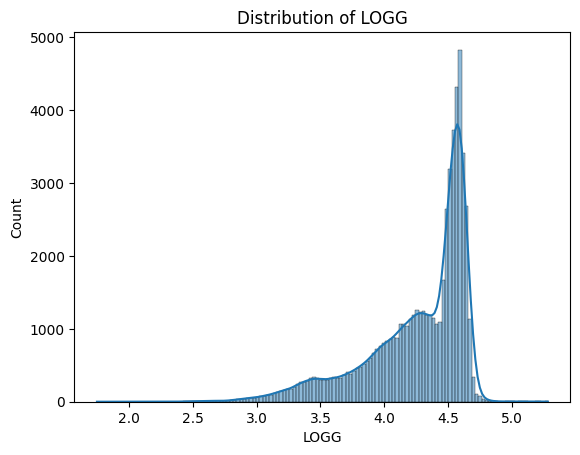

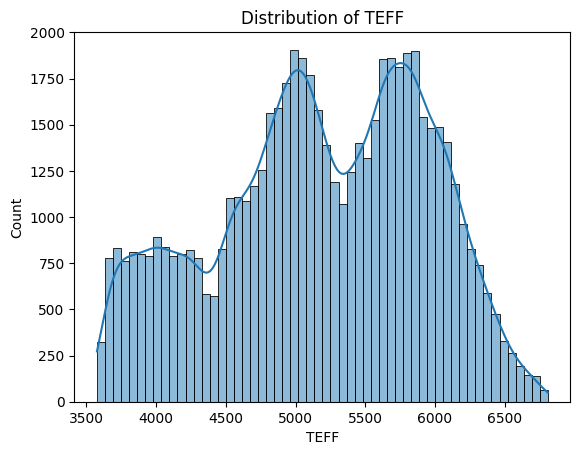

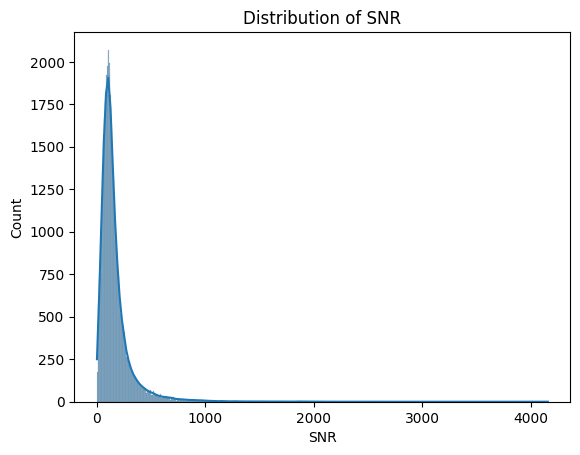

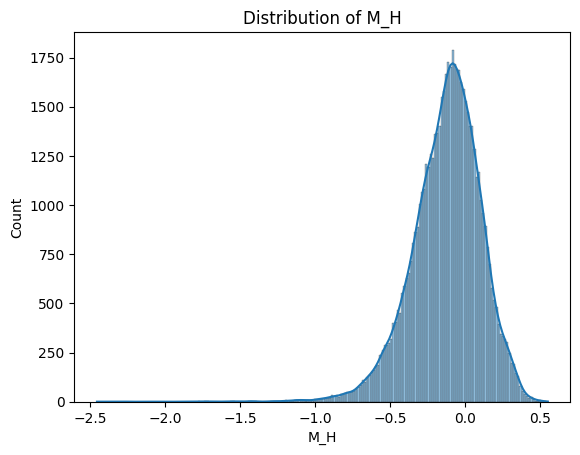

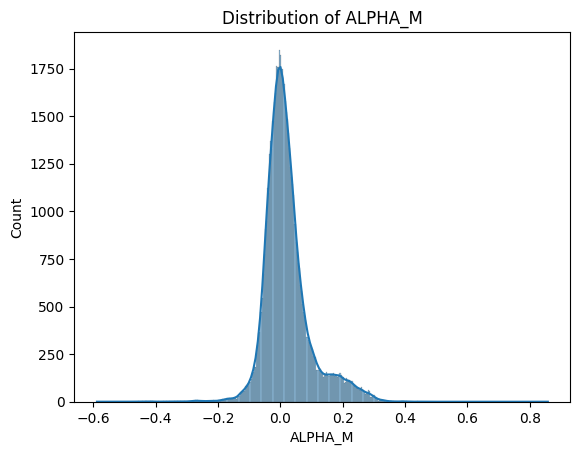

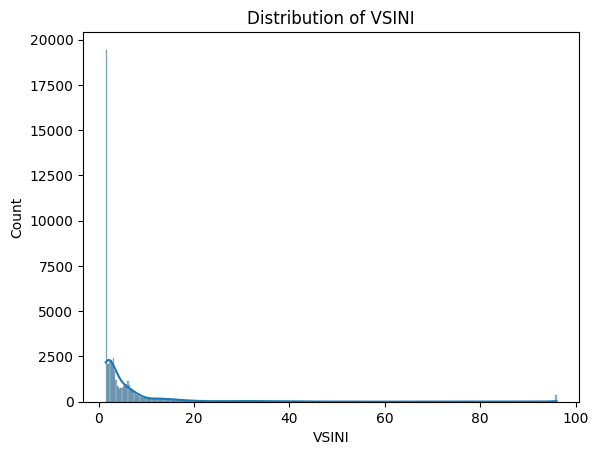

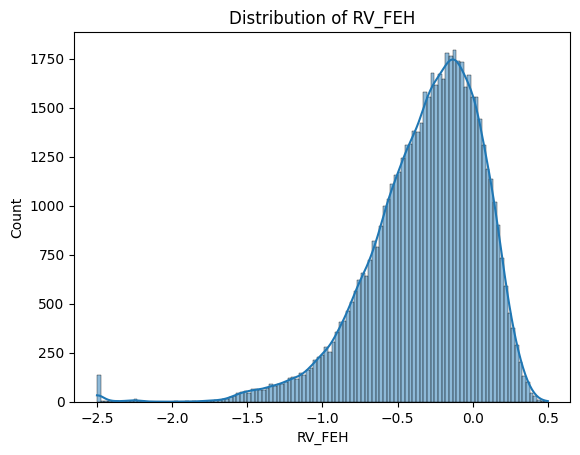

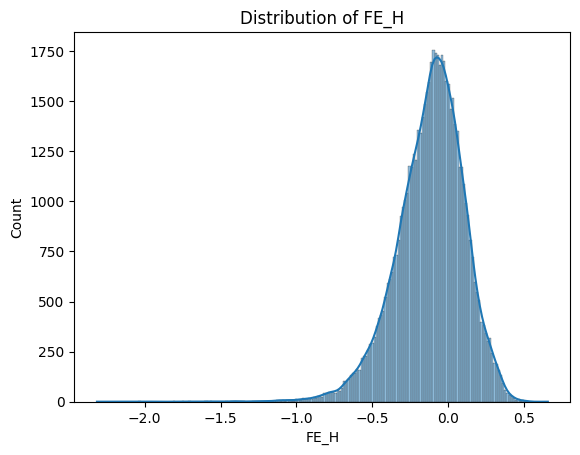

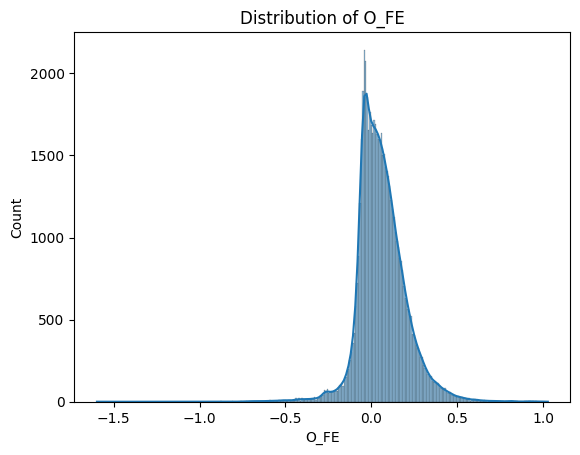

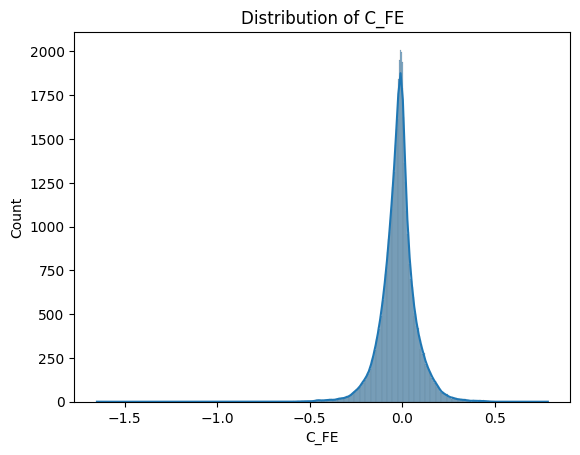

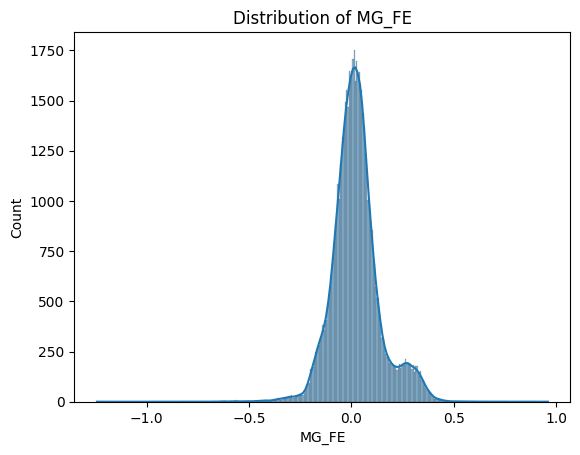

In [ ]:
# Assuming you want to plot distributions for all numeric columns
numeric_columns = final_df.select_dtypes(include=[np.float32]).columns
for column in numeric_columns:
    sns.histplot(final_df[column], kde=True)  # kde will also plot the Kernel Density Estimation
    plt.title(f'Distribution of {column}')
    plt.show()

## Pairwise Joint Distribution

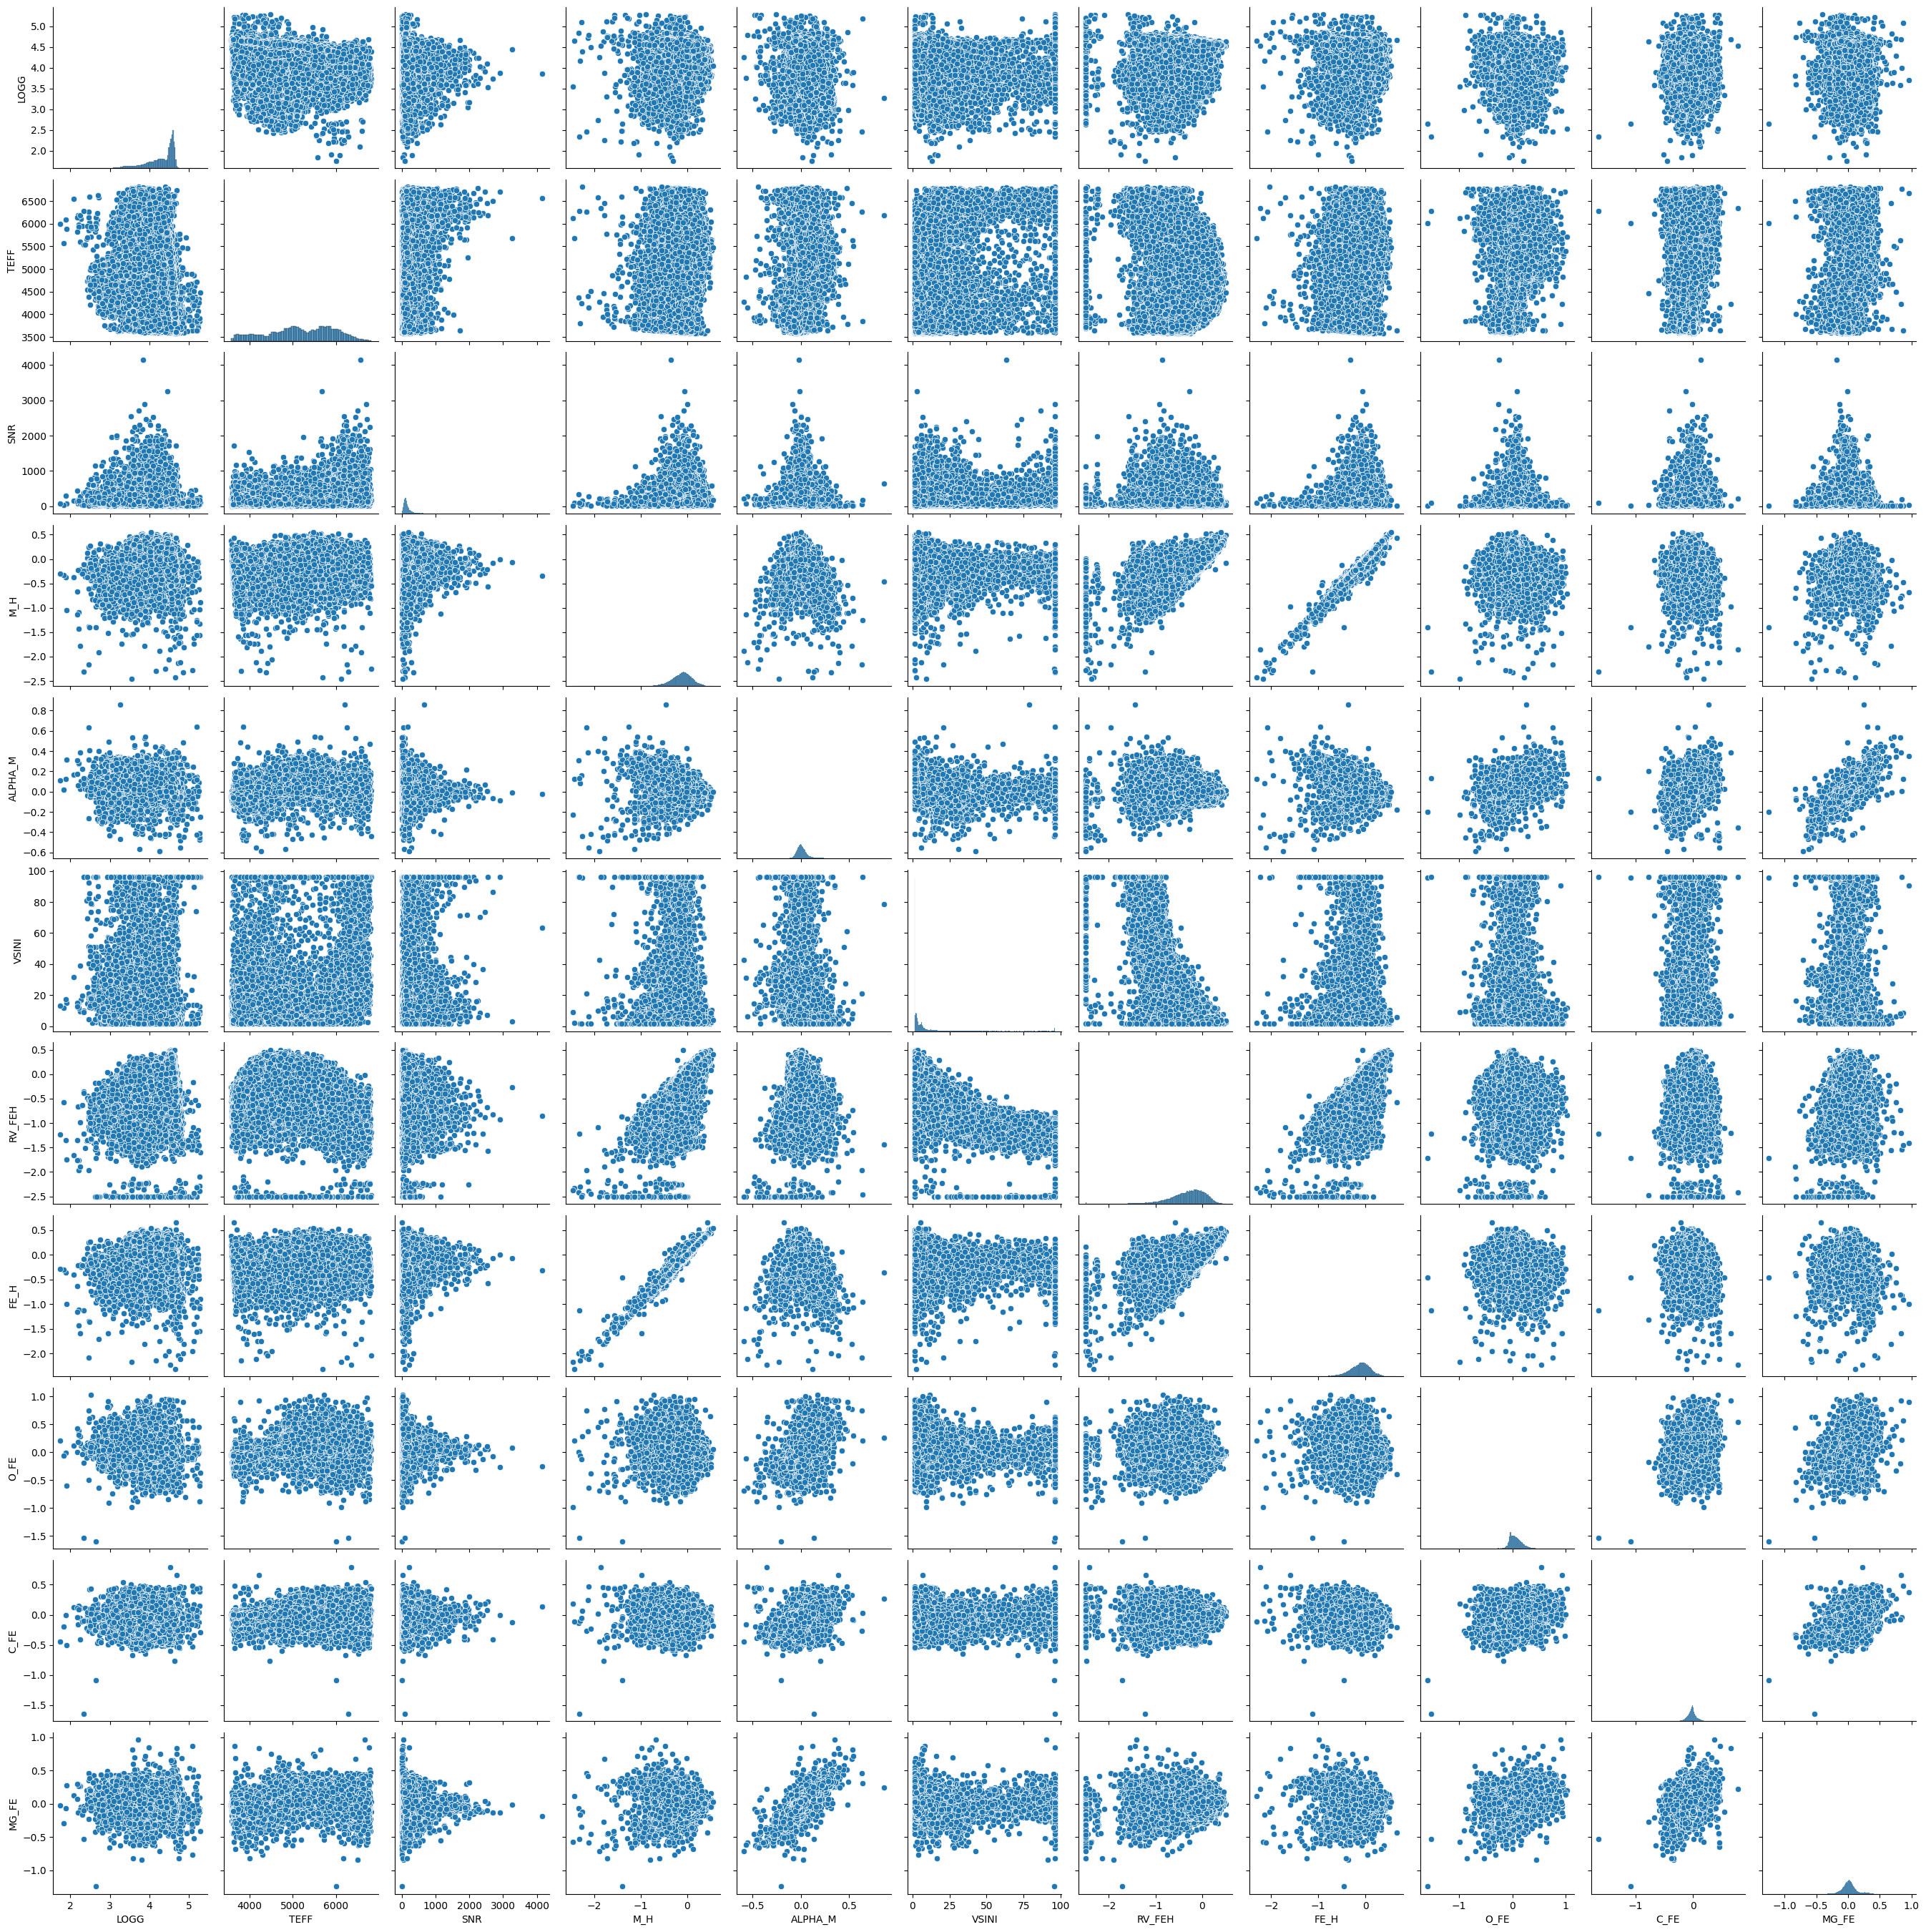

In [ ]:
sns.pairplot(final_df[numeric_columns])
plt.show()

## Count Distribution of Categorical Data

In [ ]:
categorical_columns = []  # Replace these with your actual column names

for column in categorical_columns:
    sns.countplot(data=final_df, x=column)
    plt.title(f'Count Distribution of {column}')
    plt.xticks(rotation=45)  # Useful if labels are lengthy or numerous
    plt.show()

In [ ]:
##### Parameters selected #####

# TEFF: Effective temperature
# LOGG: Surface gravity
# MG_FE: abundance of MG
# SI_FE: abundance of SI
# TI_FE: abundance of Ti
# VHELIO_AVG: averaged radial velocity
# VMICRO: microturbulent velocity